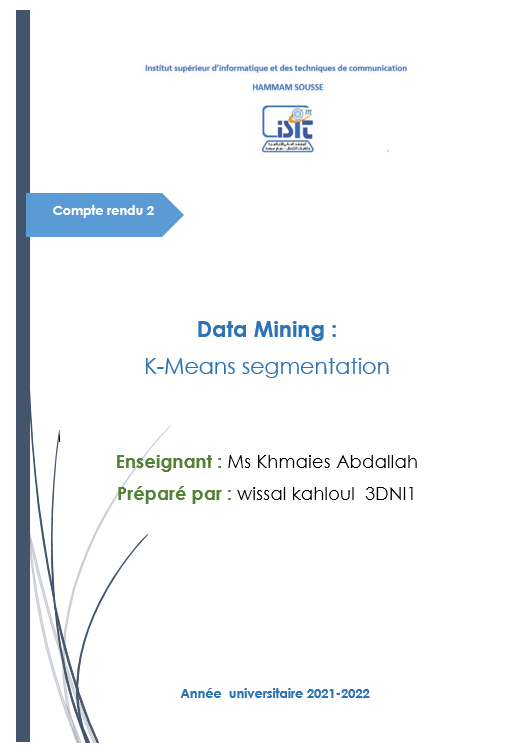

<h3><span style ="color:hotpink">
Introduction K-Means
    </span>  </h3>
    
L'algorithme k-means recherche un nombre prédéterminé de clusters dans un ensemble de données multidimensionnel non étiqueté. Pour ce faire, il utilise une conception simple de ce à quoi ressemble le clustering optimal :

**<span style ="color:indigo">
Le "centre du cluster" est la moyenne arithmétique de tous les points appartenant au cluster.
Chaque point est plus proche de son propre centre de cluster que d'autres centres de cluster.</span>**
    
**comprendre comment fonctionne :**

Lorsque nous appliquons l'algorithme de clustering k-means à une image, il prend chaque pixel comme point vectoriel et construit des k-clusters de pixels. 

1. Choisissez le nombre de clusters (K) et obtenez des pixels
2. Initialiser K-means avec des pixels aléatoires
3. Répéter les étapes 4 et 5 jusqu'à convergence ou jusqu'à la fin d'un nombre fixe d'itérations
4. pour chaque pixel Pi :
  -  Trouvez le centroïde le plus proche
  - Attribuer les pixels à ce cluster
5. pour chaque cluster Ci
  - centroïde = moyenne de tous les points attribués à ce cluster


In [19]:

#importer les libreries nécessaire 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [9]:
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import cv2

### affichage image 

In [9]:
filepath ="gellyfish.jpg"

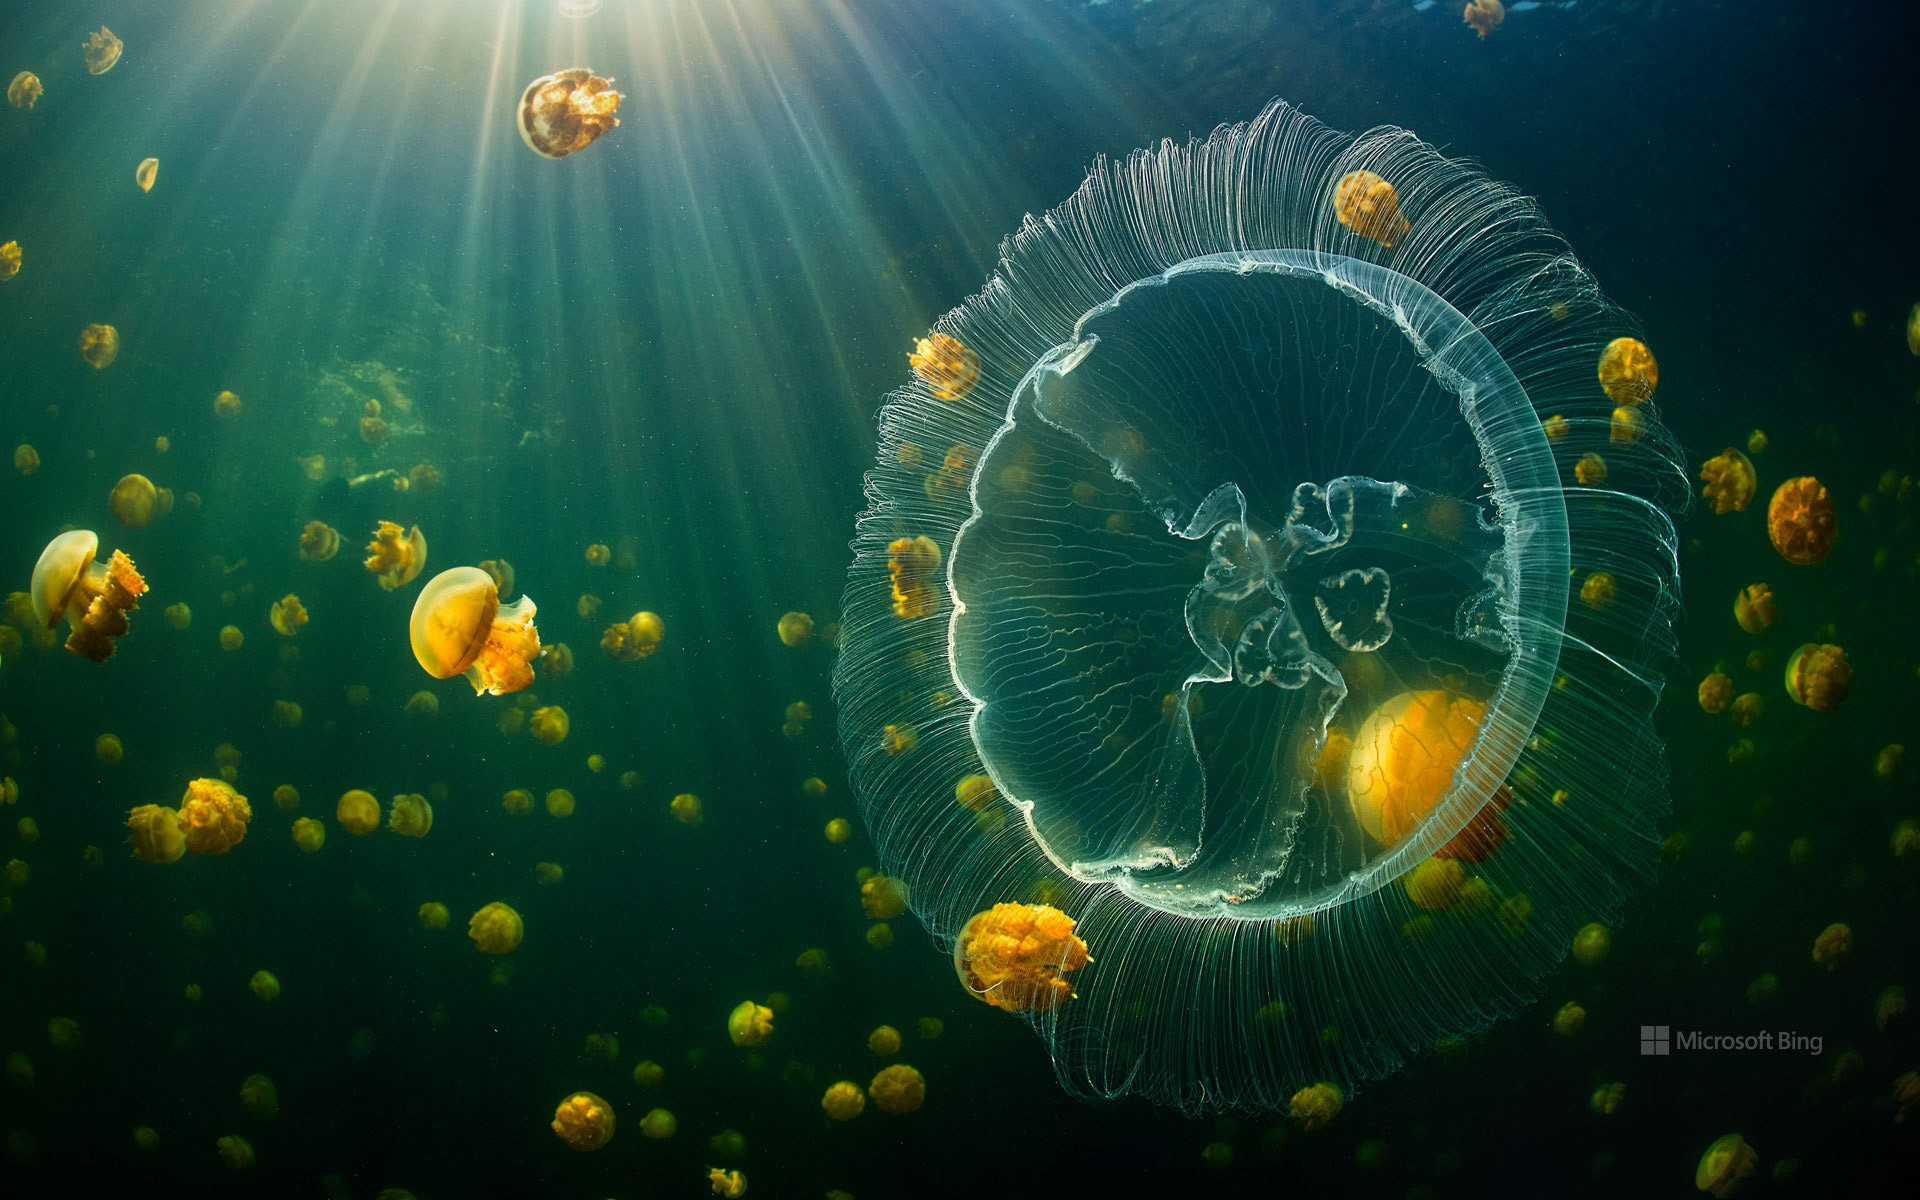

In [10]:
Image(filepath)

<h3><span style ="color:orange">
Algorithme :
    </span>  </h3>

Les entrées de l'algorithme de clustering Κ-means sont le nombre de clusters et l'ensemble de données. L'algorithme commence par des estimations initiales pour les centroïdes , qui peuvent être générés de manière aléatoire ou sélectionnés de manière aléatoire à partir de l'ensemble de données. L'algorithme itère ensuite entre deux étapes :

<h4><span style ="color:light blue">
1. Etape Data assignement
    </span>  </h4>
    
Chaque centroïde définit l'un des clusters. Dans cette étape, chaque point de données basé sur la distance euclidienne au carré est affecté à son centroïde le plus proche. Si 𝑐𝑖  est la collection de centroïdes dans l'ensemble C, alors chaque point de données x est affecté à un cluster basé sur min𝑐𝑖∈𝐶𝑑𝑖𝑠𝑡(𝑐𝑖,𝑥)2
où dist( · ) est la distance euclidienne standard (L2).  

<h4><span style ="color:light blue">
1. Etape update centroid
    </span>  </h4>
    
- Les centroïdes sont recalculés en prenant la moyenne de tous les points de données affectés au cluster de ce centroïde.

- L'algorithme itère entre les étapes une et deux jusqu'à ce qu'un critère d'arrêt soit atteint (aucun point de données ne change de cluster, la somme des distances est minimisée ou un nombre maximum d'itérations est atteint).

- Cet algorithme peut converger vers un optimum local. L'évaluation de plus d'une exécution de l'algorithme avec des centroïdes de départ aléatoires peut donner un meilleur résultat.    

<h3><span style ="color:orange">
Choisir K :
    </span>  </h3>

Si la véritable étiquette n'est pas connue à l'avance, le clustering K-Means peut être évalué à l'aide du critère de coude , du coefficient de silhouette , de la validation croisée, des critères d'information, de la méthode de saut théorique de l'information et de l'algorithme G-means.

<div class="alert alert-success">L'objectif du clustering K-Means est de minimiser la somme des carrés des distances entre tous les points et le centre du cluster.</div>

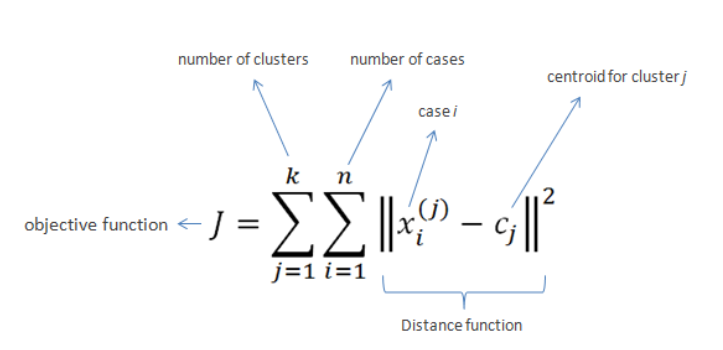

### convertir image 3D numpy array en 2D

notre tableau d'images est converti en 2D afin que Kmeans puisse être exécuté et fait avec np.reshape.

In [11]:
img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

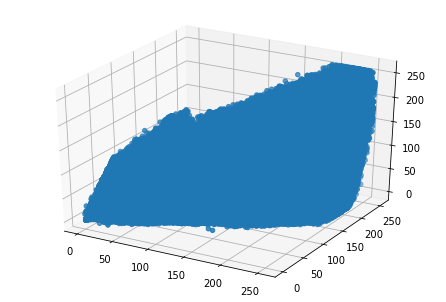

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

### Remodeler le tableau np en 2D pour effectuer des kmeans

In [13]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
print(vectorized.shape)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

(2304000, 3)


In [14]:
K=3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()

In [15]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

### afficher image resultante

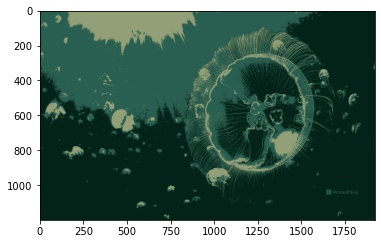

In [16]:
plt.imshow(result_image)
plt.show()

### Comparer Original et Image  Segmenté

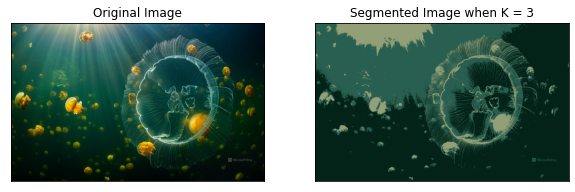

In [17]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
K=4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()
## Reshaping 2D array to 3D array
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

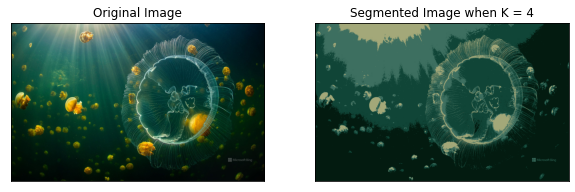

In [15]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
K=5
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
label = label.flatten()
    
## Reshaping 2D array to 3D array

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

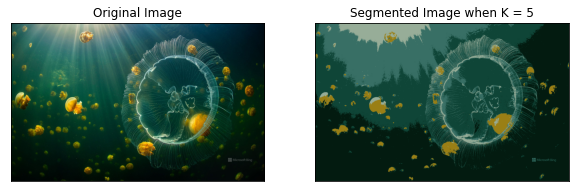

In [17]:
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1, 2, 1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

### identifier les contours

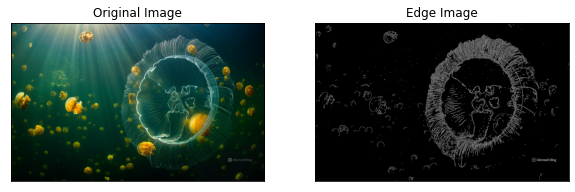

In [18]:
edges = cv2.Canny(img,150,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

### use insert Box 

In [3]:
from ipywidgets import interact,Layout
import ipywidgets as widgets
import numpy as  np
import matplotlib.pyplot as plt
import skimage.io
img_path = "gellyfish.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode):
    #plt.subplot(r,c,i)
    #plt.clf()
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.figure(num = 2, figsize = (5,5))
        plt.imshow(gimg)
    else:
        plt.figure(num = 2, figsize = (5,5))
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

In [4]:

select = widgets.Dropdown(options={"Gaussian": "gaussian",
                                  "Localvar": "localvar",
                                  "Poisson": "poisson",
                                   "Salt": "salt",
                                   "Pepper": "pepper",
                                   "s&p": "s&p",
                                   "Speckle": "speckle"
                                  },
                          description='Choisir un noise')

button = widgets.Button(description="Afficher")

In [5]:
output = widgets.Output()

def on_button_clicked(b):
    with output:
        
        plotnoise(img, select.value) 

In [7]:
vbox1 = widgets.VBox([select,button])
#vbox2 = widgets.VBox([output])

box_layout = widgets.Layout(
        border='solid 4px yellow',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')

vbox1.layout = box_layout
#vbox2.layout = box_layout
button.on_click(on_button_clicked)
widgets.HBox([vbox1])

### use progress bar values

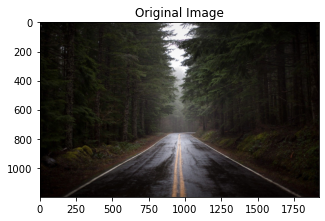

In [10]:
# Loading image
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(num = 3, figsize = (5,5))
plt.title("Original Image")
plt.imshow(image)

In [20]:
r = []
g = []
b = []
 
for row in image:
    for pixel in row:
        # A pixel contains RGB values
        r.append(pixel[0])
        g.append(pixel[1])
        b.append(pixel[2])
 
df = pd.DataFrame({'red':r, 'green':g, 'blue':b})

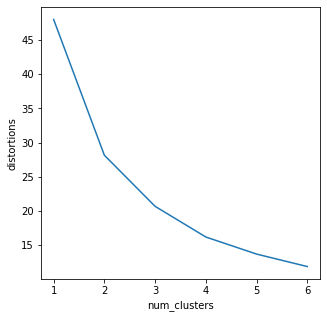

In [21]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.vq import kmeans, vq
import seaborn as sns

distortions = []
num_clusters = range(1, 7)
 
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['red','green','blue']].values.astype(float), i)
    distortions.append(distortion)
 
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
 
# Creat a line plot of num_clusters and distortions
plt.figure(num = 4, figsize=(5,5))
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)

plt.xticks(num_clusters)
plt.show()

In [30]:
def CulsterImg(k):
    # number of clusters (K)
    #k = 5
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert back to 8 bit values
    centers = np.uint8(centers)

    # flatten the labels array
    labels = labels.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

In [31]:
def plotSegmentedImage(k):
    K_N = CulsterImg(k)
    # show the image
    plt.figure(num = 5, figsize=(5,5))


    plt.imshow(image)

    #plt.subplot(2,2,2)
    plt.title('Image Clustered with k = {}'.format(k))
    plt.imshow(K_N)

    plt.show()

In [32]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

In [33]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [34]:
int_slider = widgets.IntSlider(value=2, min=1, max=7, step=1, description='Choisir K')
interact(plotSegmentedImage, k=int_slider)

interactive(children=(IntSlider(value=2, description='Choisir K', max=7, min=1), Output()), _dom_classes=('wid…

<function __main__.plotSegmentedImage(k)>